<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab3/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_holes(dataframe,  column_name, hole_percentage = 10):
    """
    Создает "дыры" в указанной колонке заданного DataFrame.

    Parameters:
        dataframe (pd.DataFrame): Исходный DataFrame.
        column_name (str): Имя колонки, в которой нужно создать "дыры".
        hole_percentage (float): Процент дырявости, который указывает, какую часть данных следует заменить на NaN.

    Returns:
        pd.DataFrame: DataFrame с "дырами" в указанной колонке.
    """
    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes


# Example
# df = pd.read_csv('path/to/file')
# df = create_holes(df, 'column')

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [2]:
df = pd.read_csv('student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
df['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [4]:
#Удаление
df_with_holes = create_holes(df, 'age')
df_cleaned = df_with_holes.dropna()
df_cleaned


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18.0,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [5]:
df_cleaned['age'].describe()

count    356.000000
mean      16.727528
std        1.276627
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Среднее значение показателя пропусков изменилось по сравнению с изначальным значением, поскольку мы удалили часть значений. Изменилось среднеквадратичное отклонение, оно стало иеньше, что означает, что значения стали менее "разбросаны" в своём интервале. Так же изменилось максимальное значение (было 22, стало 21)

In [6]:
# #Заполнение при помощи медианы

df_filled_by_median = df_cleaned.copy()
df_filled_by_median['age'] = df_filled_by_median['age'].fillna(df_filled_by_median['age'].median())
df_filled_by_median

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18.0,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [7]:
df_filled_by_median['age'].describe()

count    356.000000
mean      16.727528
std        1.276627
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

При заполнении пропусков медианой мы видим, что уменьшились значения среднего и среднеквадратичного. При таком способе данные подвергаются минимальным изменениям.

In [8]:
# #Заполнение при помощи среднего

df_filled_by_mean = df_cleaned.copy()
df_filled_by_mean['age'] = df_filled_by_mean['age'].fillna(df_filled_by_mean['age'].mean())
df_filled_by_mean


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18.0,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [9]:
df_filled_by_mean['age'].describe()

count    356.000000
mean      16.727528
std        1.276627
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

При заполнении пропусков средними значениями видно, что немного уменьшилось среднее значение и сильно уменьшилось среднеквадртичное значение. Так произошло из-за того, что огромная часть значений теперь являются средним значением. Так же максимальное значение уменьшилось на 2 единицы.

In [10]:
# #Заполнение при помощи моды

df_filled_by_moda  = df_cleaned.copy()
df_filled_by_moda['Mjob'] = df['Mjob'].fillna(df['Mjob'].mode()[0])
df_filled_by_moda

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18.0,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [11]:
df_filled_by_moda['Mjob'].describe()

count       356
unique        5
top       other
freq        125
Name: Mjob, dtype: object

Так как пропуски встречаются в том числе и в колонке Mjob, которая является категориальной, её пустые значения необходимо заполнить на основе моды. Значения заполнились значением other, поскольку это самое часто встречающееся слово в данной колонке.

In [16]:
# #Заполнение при помощи интерполяции

df_interpolated = df_cleaned.copy()
df_interpolated = df_interpolated.interpolate()
df_interpolated

C:\Users\vadik\AppData\Local\Temp\ipykernel_20724\1189533936.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_interpolated.interpolate()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18.0,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [18]:
df_interpolated.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,16.727528,2.780899,2.530899,1.441011,2.058989,0.325843,3.935393,3.252809,3.176966,1.494382,2.314607,3.547753,5.654494,10.955056,10.724719,10.443820
std,1.276627,1.078484,1.085967,0.699620,0.848796,0.728112,0.899944,1.000348,1.102942,0.902249,1.309515,1.398378,7.718006,3.336221,3.809929,4.607366
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.500000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Метод интерполяции срабатывает очень плохо, либо не срабатывает вовсе, так как датафреймы до и после использования метода не отличаются вовсе.

**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


In [20]:
df['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

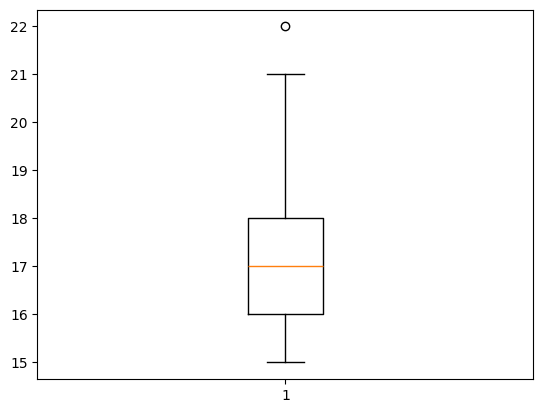

In [24]:
#Методом среднего
df_mean = df.dropna()
df_mean.loc[0:10, 'age'] = 100
plt.boxplot(df['age'])
plt.show()

In [25]:
#При помощи межквартильного размаха
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

df_filtered = remove_outliers(df, 'age')

df_filtered

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [27]:
#Статистика и объяснение
mean = df["age"].mean()
std_deviation = df["age"].std()
threshold = 3 * std_deviation

# Идентифицируем выбросы
outliers = [x for x in df["age"] if abs(x - mean) > threshold]

# Выводим результаты
print("Среднее значение:", mean)
print("Стандартное отклонение:", std_deviation)
print("Потенциальные выбросы:", outliers)

Среднее значение: 16.696202531645568
Стандартное отклонение: 1.2760427246056283
Потенциальные выбросы: [22, 21]


**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [28]:
#Проверка на дубли
df_dub = df[df.duplicated()]
df_dub

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [30]:
# Создание дублей
df = pd.concat((df, df.loc[0:100]))
df_dub = df[df.duplicated()]
df_dub

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,3,1,1,4,2,11,15,15
97,GP,F,16,U,GT3,T,2,1,other,other,...,4,3,5,1,1,5,2,8,9,10
98,GP,F,16,U,GT3,T,4,4,other,other,...,5,3,4,1,2,1,6,11,14,14
99,GP,F,16,U,GT3,T,4,3,other,at_home,...,5,3,5,1,1,3,0,7,9,8


In [31]:
#Удаление дублей
df = df.drop_duplicates()
df_no_dub = df[df.duplicated()]
df_no_dub

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()

df_minmax_scale = df.copy()
nums = df.select_dtypes(include=['int64']).columns
df_minmax_scale[nums] = min_max_scaler.fit_transform(df[nums])
df_minmax_scale.absences.unique()

array([0.08      , 0.05333333, 0.13333333, 0.02666667, 0.        ,
       0.21333333, 0.18666667, 0.09333333, 0.10666667, 0.33333333,
       0.16      , 0.72      , 0.24      , 0.34666667, 0.26666667,
       0.74666667, 0.32      , 0.37333333, 0.06666667, 0.17333333,
       0.2       , 0.29333333, 0.04      , 0.28      , 0.01333333,
       1.        , 0.4       , 0.25333333, 0.12      , 0.14666667,
       0.50666667, 0.53333333, 0.30666667, 0.22666667])

In [33]:
# Creating instances
standard_scaler = StandardScaler()

df_std_scale = df.copy()
df_std_scale[nums]= standard_scaler.fit_transform(df[nums])

In [34]:
df_scaled_by_minmax = df.copy()
df_scaled_by_minmax[nums] = df_minmax_scale[nums]
df_scaled_by_minmax

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,0.428571,U,GT3,A,1.00,1.00,at_home,teacher,...,0.75,0.50,0.75,0.00,0.00,0.50,0.080000,0.1250,0.315789,0.30
1,GP,F,0.285714,U,GT3,T,0.25,0.25,at_home,other,...,1.00,0.50,0.50,0.00,0.00,0.50,0.053333,0.1250,0.263158,0.30
2,GP,F,0.000000,U,LE3,T,0.25,0.25,at_home,other,...,0.75,0.50,0.25,0.25,0.50,0.50,0.133333,0.2500,0.421053,0.50
3,GP,F,0.000000,U,GT3,T,1.00,0.50,health,services,...,0.50,0.25,0.25,0.00,0.00,1.00,0.026667,0.7500,0.736842,0.75
4,GP,F,0.142857,U,GT3,T,0.75,0.75,other,other,...,0.75,0.50,0.25,0.00,0.25,1.00,0.053333,0.1875,0.526316,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,0.714286,U,LE3,A,0.50,0.50,services,services,...,1.00,1.00,0.75,0.75,1.00,0.75,0.146667,0.3750,0.473684,0.45
391,MS,M,0.285714,U,LE3,T,0.75,0.25,services,services,...,0.25,0.75,1.00,0.50,0.75,0.25,0.040000,0.6875,0.842105,0.80
392,MS,M,0.857143,R,GT3,T,0.25,0.25,other,other,...,1.00,1.00,0.50,0.50,0.50,0.50,0.040000,0.4375,0.421053,0.35
393,MS,M,0.428571,R,LE3,T,0.75,0.50,services,other,...,0.75,0.75,0.00,0.50,0.75,1.00,0.000000,0.5000,0.631579,0.50


In [35]:
df_scaled_by_std = df.copy()
df_scaled_by_std[nums] = df_std_scale[nums]
df_scaled_by_std

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,1.023046,U,GT3,A,1.143856,1.360371,at_home,teacher,...,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934
1,GP,F,0.238380,U,GT3,T,-1.600009,-1.399970,at_home,other,...,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934
2,GP,F,-1.330954,U,LE3,T,-1.600009,-1.399970,at_home,other,...,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739
3,GP,F,-1.330954,U,GT3,T,1.143856,-0.479857,health,services,...,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004
4,GP,F,-0.546287,U,GT3,T,0.229234,0.440257,other,other,...,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,2.592380,U,LE3,A,-0.685387,-0.479857,services,services,...,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,-0.575827,-0.456226,-0.309288
391,MS,M,0.238380,U,LE3,T,0.229234,-1.399970,services,services,...,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.932473,1.407091,1.220553
392,MS,M,3.377047,R,GT3,T,-1.600009,-1.399970,other,other,...,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,-0.274167,-0.722415,-0.746385
393,MS,M,1.023046,R,LE3,T,0.229234,-0.479857,services,other,...,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.027493,0.342338,-0.090739


Масштабируйте категориальные признаки через OneHotEncoder

In [36]:
df_encoded = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher      395

In [37]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

cats = df_encoded.select_dtypes(include=['object']).columns
cats_encoded = encoder.fit_transform(df_encoded[cats])
columns_encoded = encoder.get_feature_names_out(cats)
columns_encoded

c:\Users\vadik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes',
       'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
       'internet_yes', 'romantic_yes'], dtype=object)

In [38]:
df_with_encode = pd.DataFrame(cats_encoded, columns=columns_encoded)
df_with_encode

,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
391,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
392,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
393,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [39]:
df_encoded = df_encoded.drop(columns=cats)
df_final = pd.concat([df_encoded, df_with_encode], axis=1)
df_final

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,3,4,3,2,2,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,16,3,3,1,2,0,4,3,2,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
391,17,3,1,2,1,0,2,4,5,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
392,21,1,1,1,1,3,5,5,3,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
393,18,3,2,3,1,0,4,4,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])